Assalamualaikum...Haloo saya Nurul Ilmi Hasanah dari tim Spectro, ini tugas saya😊😊😊

In [71]:
import pandas as pada
import numpy as napi
import matplotlib.pyplot as plip
import seaborn as seb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [72]:
datanya = pada.read_csv('ai4i2020.csv')

In [70]:
datanya

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [69]:
targetnya = datanya["Machine failure"].to_numpy()
fiturnya = datanya.copy().drop(["Product ID", "Machine failure", "Type"], axis=1).to_numpy()

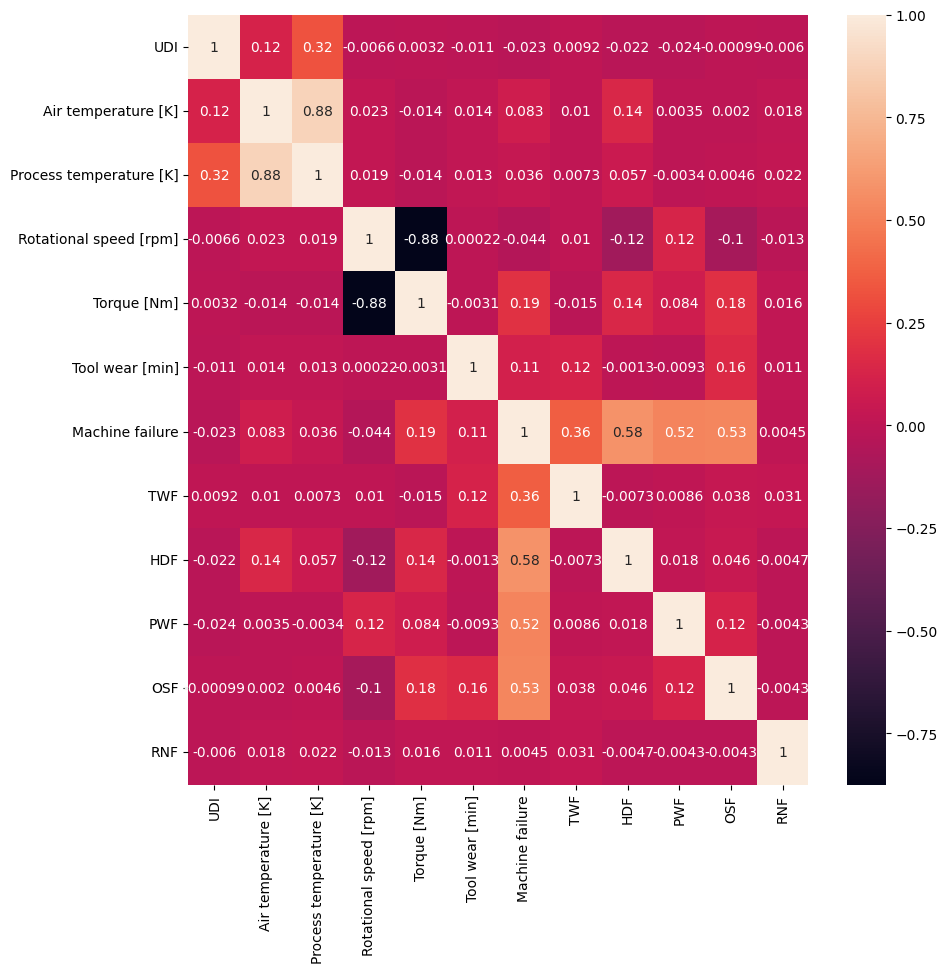

In [48]:
# membuat correlation matriks
corr_matrix = datanya.corr(numeric_only=True)
fig, ax = plip.subplots(figsize=(10,10))
seb.heatmap(corr_matrix, annot=True)
plip.show()

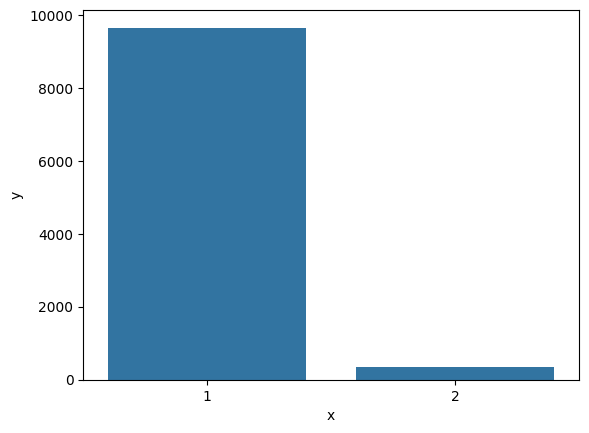

In [68]:
# membuat barplot
diagram = datanya["Machine failure"]
tabel = diagram.value_counts()
tabel = tabel.sort_index()
raw_data = {'x': [1, 2], 'y': tabel.values}
seb.barplot(x='x', y='y', data=raw_data)
plip.show()

In [67]:
fiturnya_train, fiturnya_test, targetnya_train, targetnya_test = train_test_split(fiturnya, targetnya, test_size=0.4, random_state=11235)

In [63]:
logistic_regressor = LogisticRegression(solver='liblinear', max_iter=200)
logistic_regressor.fit(fiturnya_train, targetnya_train)


LogisticRegression(max_iter=200, solver='liblinear')

In [64]:
test_pred = logistic_regressor.predict(fiturnya_test)

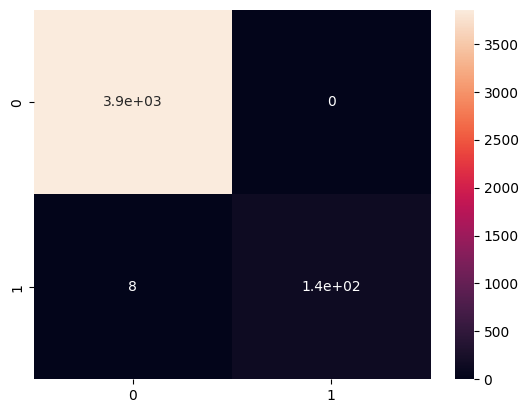

In [65]:
# membuat confusion matriks
conf_mat = metrics.confusion_matrix(targetnya_test, test_pred)
seb.heatmap(conf_mat, annot=True)
plip.show()

In [66]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/napi.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(napi.round(accuracy,3)))
print('Sensitvity  = {}'.format(napi.round(sensitivity,3)))
print('Specificity = {}'.format(napi.round(specificity,3)))
print('Precision   = {}'.format(napi.round(precision,3)))

Accuracy    = 0.998
Sensitvity  = 0.944
Specificity = 1.0
Precision   = 1.0


Maka Akurasinya sebesar 99,8%, Sensitivitas sebesar 94,4%, Spesifisitas sebesar 100%, dan Presisi sebesar 100%